In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')

## Necessary data preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder1 = LabelEncoder()
data['Weekend'] = encoder1.fit_transform(data['Weekend'])
data['Revenue'] = encoder1.fit_transform(data['Revenue'])

encoder2 = LabelEncoder()
data['VisitorType'] = encoder2.fit_transform(data['VisitorType'])

encoder3 = OneHotEncoder()
data['Month'] = encoder2.fit_transform(data['Month'])

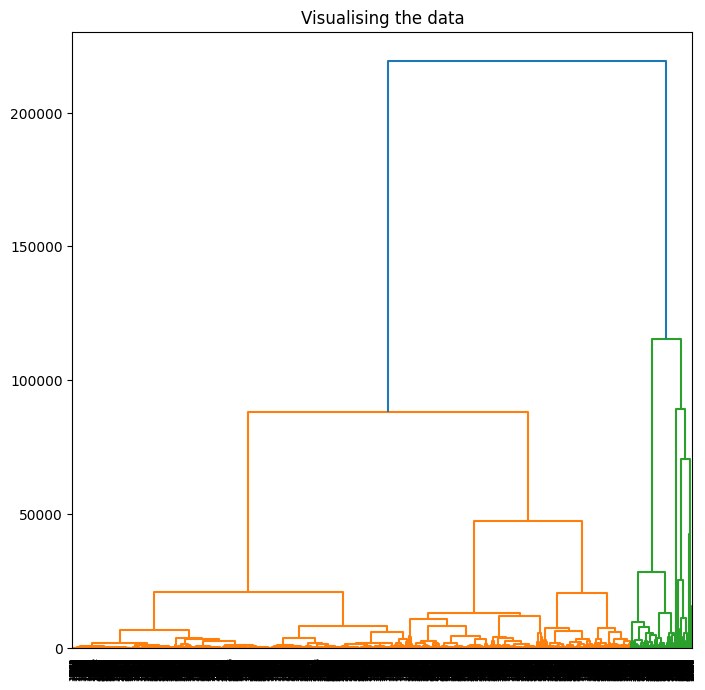

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

# Additional data preprocessing


## No data preprocessing

In [ ]:
models = [SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors'),
          SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors'),
          SpectralClustering(n_clusters = 7, affinity = 'nearest_neighbors')]
clusters = [3, 5, 7]

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(data)
  print(f'Silhouette score: {silhouette_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.3014939891562793 for number of clusters: 3
Davies-Bouldin score: 0.6847163760794986 for number of clusters: 3
Calinski-Harabasz score: 8173.916443844546 for number of clusters: 3
Silhouette score: 0.2670809163917195 for number of clusters: 5
Davies-Bouldin score: 0.6485251369661132 for number of clusters: 5
Calinski-Harabasz score: 9165.71004137128 for number of clusters: 5
Silhouette score: 0.3268801903392257 for number of clusters: 7
Davies-Bouldin score: 0.6833842756729177 for number of clusters: 7
Calinski-Harabasz score: 8794.67788855955 for number of clusters: 7


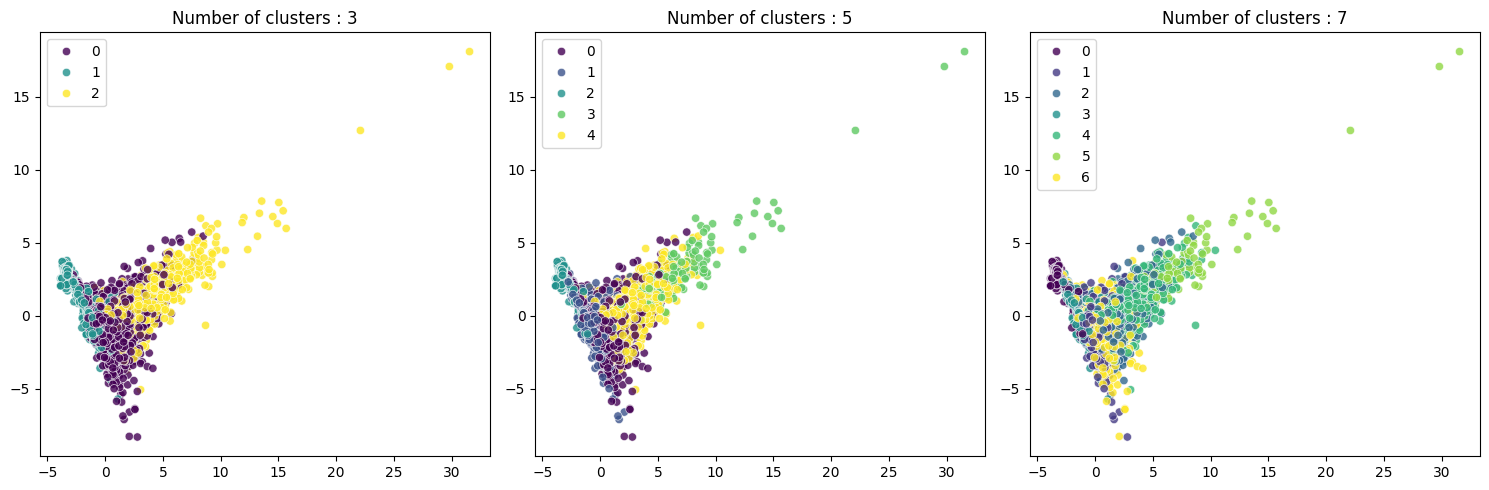

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Standardization & PCA

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

pca = PCA(n_components = 2)
new_data = pca.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.3843314052098129 for number of clusters: 3
Davies-Bouldin score: 0.8398869924172411 for number of clusters: 3
Calinski-Harabasz score: 5756.386264190519 for number of clusters: 3
Silhouette score: 0.3455000079842173 for number of clusters: 5
Davies-Bouldin score: 0.7784005345957441 for number of clusters: 5
Calinski-Harabasz score: 7512.643766248815 for number of clusters: 5
Silhouette score: 0.31821939210940475 for number of clusters: 7
Davies-Bouldin score: 0.763912161474413 for number of clusters: 7
Calinski-Harabasz score: 7539.344683290919 for number of clusters: 7


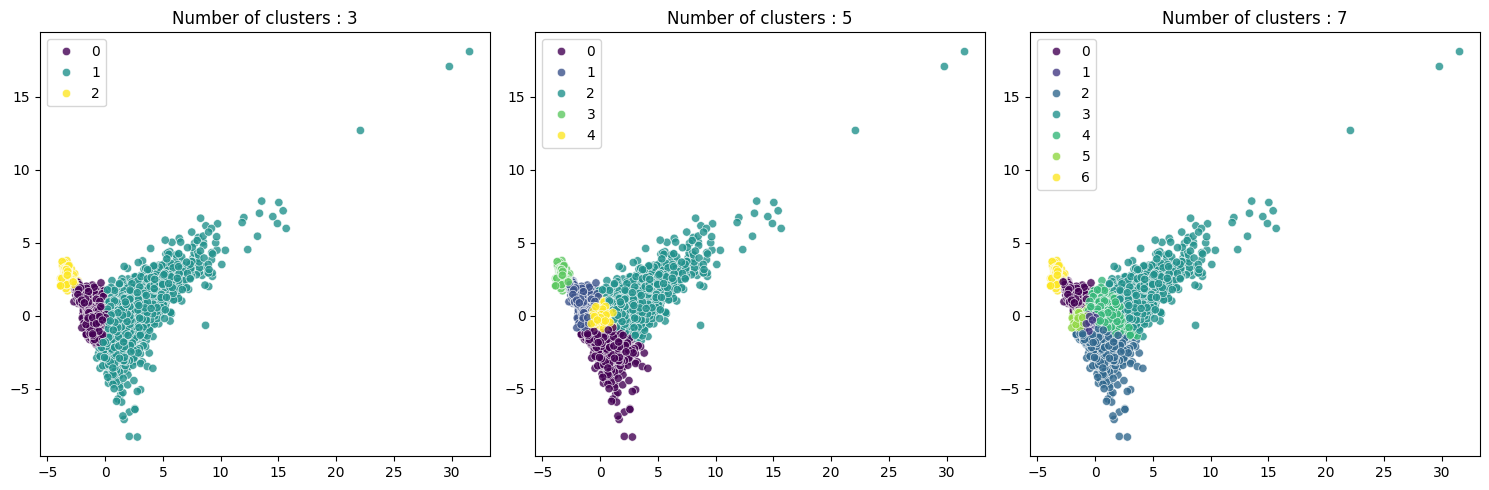

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = new_data[:, 0], y = new_data[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Min-Max Scaling & Outlier removal

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.08647060098412128 for number of clusters: 3
Davies-Bouldin score: 2.560599549776592 for number of clusters: 3
Calinski-Harabasz score: 120.70251054954775 for number of clusters: 3
Silhouette score: 0.09788124207265607 for number of clusters: 5
Davies-Bouldin score: 1.932187456940835 for number of clusters: 5
Calinski-Harabasz score: 154.73279431544017 for number of clusters: 5
Silhouette score: 0.1445348076589246 for number of clusters: 7
Davies-Bouldin score: 1.6187204600514724 for number of clusters: 7
Calinski-Harabasz score: 177.57877094696443 for number of clusters: 7


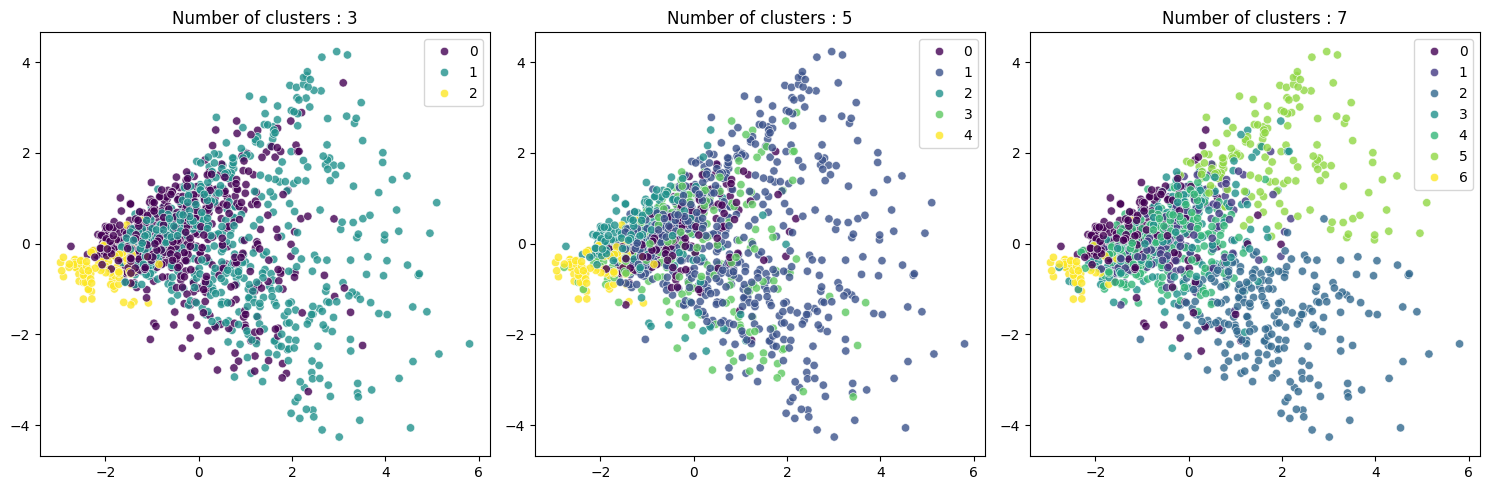

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Log transformation & normalization

In [ ]:
new_data = np.log1p(data + 1)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
new_data = normalizer.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.35206357786872383 for number of clusters: 3
Davies-Bouldin score: 0.9949557671849859 for number of clusters: 3
Calinski-Harabasz score: 6051.609250585525 for number of clusters: 3
Silhouette score: 0.3365166030498716 for number of clusters: 5
Davies-Bouldin score: 1.0363901587573021 for number of clusters: 5
Calinski-Harabasz score: 5441.149048204877 for number of clusters: 5
Silhouette score: 0.3186306530869976 for number of clusters: 7
Davies-Bouldin score: 1.1125404247322996 for number of clusters: 7
Calinski-Harabasz score: 4767.6653788252415 for number of clusters: 7


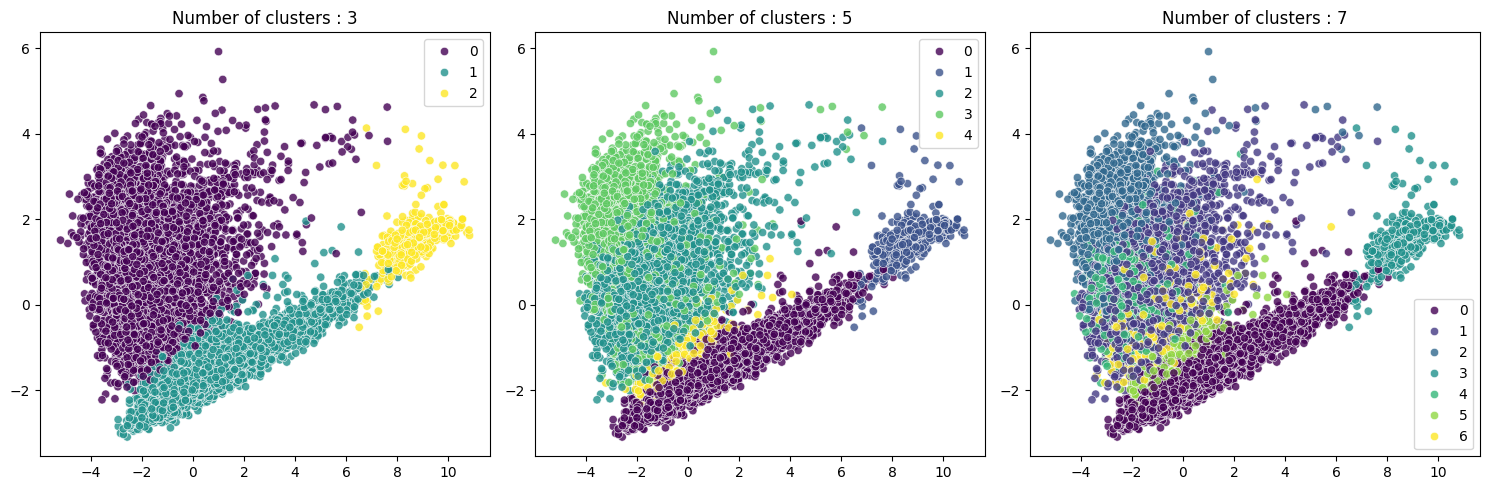

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Feature selection & discretization

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0.01)
new_data = var_thresh.fit_transform(data)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
new_data = discretizer.fit_transform(new_data)

In [ ]:
models2 = [SpectralClustering(n_clusters = 3, affinity = 'rbf'),
          SpectralClustering(n_clusters = 5, affinity = 'rbf'),
          SpectralClustering(n_clusters = 7, affinity = 'rbf')]

for i in range(len(models2)):
  labels = models2[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.2923756617455767 for number of clusters: 3
Davies-Bouldin score: 1.270270365287722 for number of clusters: 3
Calinski-Harabasz score: 1729.4592162276454 for number of clusters: 3
Silhouette score: 0.28140927032419905 for number of clusters: 5
Davies-Bouldin score: 1.0904871160872316 for number of clusters: 5
Calinski-Harabasz score: 1144.7011232209154 for number of clusters: 5
Silhouette score: 0.22856627383935016 for number of clusters: 7
Davies-Bouldin score: 1.0717999940845022 for number of clusters: 7
Calinski-Harabasz score: 770.8501219455842 for number of clusters: 7


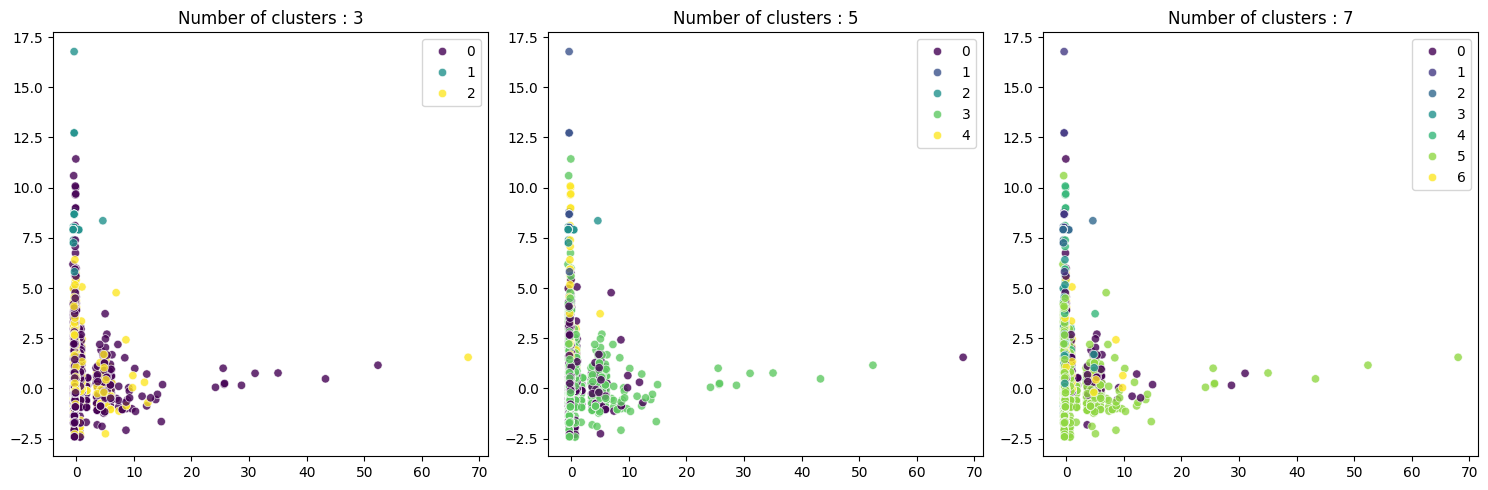

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models2[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Robust Scaling & Feature Engineering

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
new_data = scaler.fit_transform(data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
new_data = poly.fit_transform(new_data)

In [ ]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.7145826255784267 for number of clusters: 3
Davies-Bouldin score: 1.087959894016371 for number of clusters: 3
Calinski-Harabasz score: 4176.576091506253 for number of clusters: 3
Silhouette score: 0.36372581936655507 for number of clusters: 5
Davies-Bouldin score: 1.0541453841873707 for number of clusters: 5
Calinski-Harabasz score: 4230.104262276565 for number of clusters: 5
Silhouette score: 0.5055490265108877 for number of clusters: 7
Davies-Bouldin score: 0.9686331916386728 for number of clusters: 7
Calinski-Harabasz score: 3624.434134398436 for number of clusters: 7


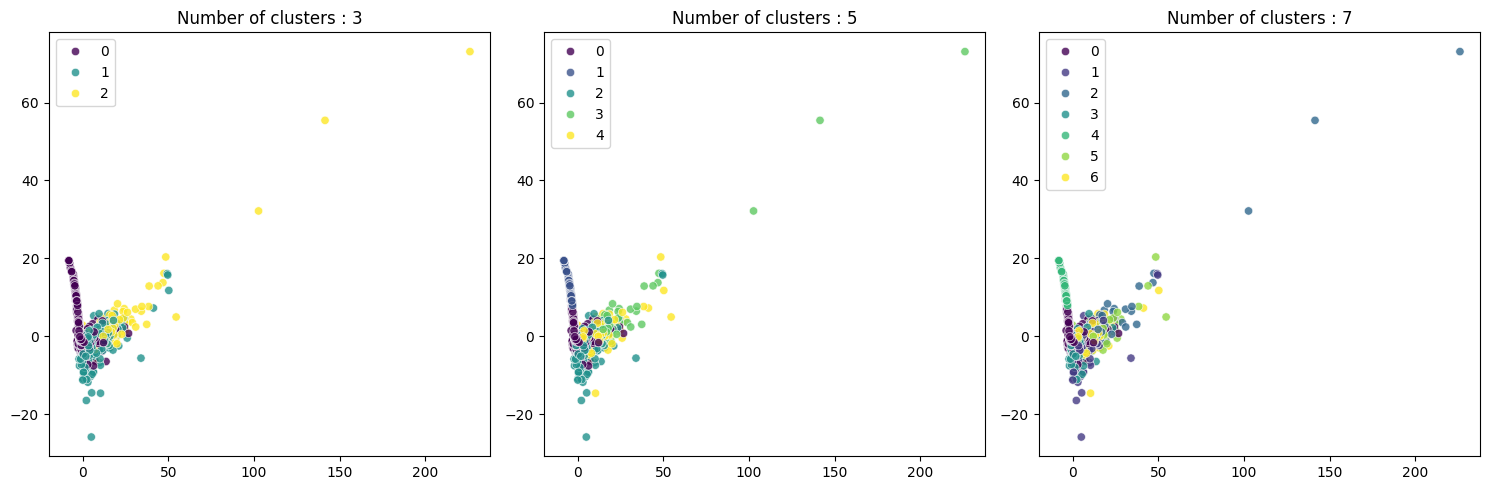

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()